In [11]:
%matplotlib inline
import os
os.chdir("../")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import json
from src import utils
from IPython.display import clear_output
import pickle
from collections import Counter


# OLD plot figures for section 2

In [2]:

sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 2)
utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX
raw_df = pd.DataFrame({"x": np.load("/NL/token-pricing/work/outputs/lengths_overwhelmed and speechless.npy"), "y": np.load("/NL/token-pricing/work/outputs/probs_overwhelmed and speechless.npy")})


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# draw axis
sns.barplot(data=raw_df, x="x",y="y", palette=palette, ax=ax)            
sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Token sequence price")
ax.set_ylabel("Probability (conditional)")
#ax.legend(title="p", loc='upper left')

fig.tight_layout()
plt.show()
#fig.savefig('figures/hist.pdf', dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: '/NL/token-pricing/work/outputs/lengths_overwhelmed and speechless.npy'

# Plot fixed string

In [59]:


# Function to get unique numbers and their counts
def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

with open("/NL/token-pricing/work/outputs/fixed_string/Llama/total_tok.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.95_k2000_maxlength13_multi.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    tok__2000= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_k_met"]==True]
    
with open("/NL/token-pricing/work/outputs/fixed_string/Llama/plaussibility_p0.99_k5000_maxlength13_multi.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]
    tok__5000= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_k_met"]==True]


    

lengths, counts = get_unique_and_counts(tok)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)
lengths__2000, counts__2000 = get_unique_and_counts(tok__2000)
lengths__5000, counts__5000 = get_unique_and_counts(tok__5000)


counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)
counts__2000 = align(lengths, lengths__2000, counts__2000)
counts__5000 = align(lengths, lengths__5000, counts__5000)


#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts, "counts_095": counts_095, "counts_099": counts_099, "counts__2000": counts__2000, "counts__5000": counts__5000})


#df_long = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_08_', 'counts_09_', 'counts_095_', 'counts_099_'],  var_name='class', value_name='y')

df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_095' ],  var_name='class', value_name='y')
df_long_k = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts__5000', 'counts__2000'],  var_name='class', value_name='y')



[Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4'), Text(3, 0, '5'), Text(4, 0, '6'), Text(5, 0, '7'), Text(6, 0, '8'), Text(7, 0, '9'), Text(8, 0, '10'), Text(9, 0, '11'), Text(10, 0, '12'), Text(11, 0, '13'), Text(12, 0, '14'), Text(13, 0, '15')]


/tmp/ipykernel_418154/674129743.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)  # Update the x-axis labels


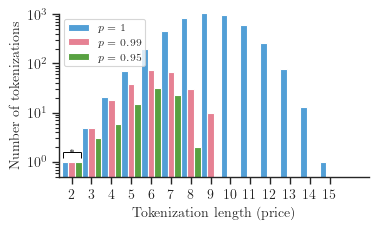

In [60]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=permuted_palette, ax=ax, width=1, legend=True)   

ax.legend(title="p", loc='upper left')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="7.5",loc='upper left', title='', labels=[r"$p=1$",r"$p=0.99$", r"$p=0.95$"])


sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length (price)")
ax.set_ylabel("Number of tokenizations")

print(ax.get_xticklabels())
x_labels = ax.get_xticklabels()  # Get the current x-axis labels
#x_labels[0].set_text(r"$2^*$") 
ax.set_xticklabels(x_labels)  # Update the x-axis labels
#print(ax.get_xticklabels())

plt.hlines(y=1.6, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.text(-0.155,1.5,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,15])
ax.set_ylim([0.5,10**3])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topp_llm.pdf', dpi=300)

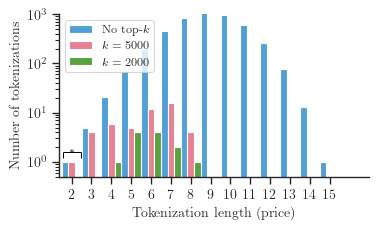

In [61]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_k, x="lengths",y="y",hue="class", palette=permuted_palette, ax=ax, width=1, legend=True)   

#ax.legend(title="p", loc='upper left')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="small",loc='upper left', title='', labels=[r"No top-$k$",r"$k=5000$", r"$k=2000$"])


plt.hlines(y=1.6, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.text(-0.13,1.5,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,15])
ax.set_ylim([0.5,10**3])

sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length (price)")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topk_llm.pdf', dpi=300)

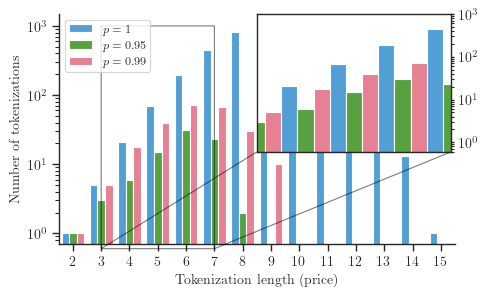

In [ ]:



width_pt = 600
palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[1], palette[0]] 
utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# draw axis
sns.barplot(data=df_long, x="lengths",y="y",hue="class", palette=permuted_palette, ax=ax, width=0.8, legend=True)   




# Add an inset axis
axins = ax.inset_axes(
    [0.5, 0.4, 0.49, 0.6],  # [left, bottom, width, height] in figure coordinates
    xlim=(1, 2), ylim=(10**0, 10**3),
    xticklabels=[])

# Zoomed-in plot with Seaborn
sns.barplot(data=df_long, x="lengths", y="y",hue="class",width=1,palette=permuted_palette, ax=axins, legend=False)
axins.set_xlim(1, 5)  # Explicitly set xlim after plotting
axins.set_ylim(0.6, 10**3)  # Explicitly set xlim after plotting
ax.indicate_inset_zoom(axins, edgecolor="black")

axins.tick_params(axis="both", which="both", length=0)  # Optionally hide the ticks
axins.set_xlabel("")  # Remove x-axis label
axins.set_ylabel("")  # Remove y-axis label
axins.set_yscale("log")
 
ax.indicate_inset_zoom(axins, edgecolor="black", linestyle="--", linewidth=0.05)
axins.tick_params(axis="y", which="both", length=2)  # Adjust tick length as needed
axins.yaxis.set_label_position("right")
axins.yaxis.tick_right()

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="small",loc='upper left', title='', labels=[r"$p=1$",r"$p=0.95$", r"$p=0.99$"])


#sns.despine(ax=axins, right=False, left=True)
sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length (price)")
ax.set_ylabel("Number of tokenizations")
#ax.legend(title="p", loc='upper left')

fig.tight_layout()
plt.show()
#fig.savefig('figures/hist.pdf', dpi=300)

In [63]:


# Function to get unique numbers and their counts
def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/tokenizations_fixed_causeless.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/plaussibility_p0.95_k2000_maxlength13_multi_causeless.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    tok__2000= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_k_met"]==True]
    
with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/plaussibility_p0.99_k5000_maxlength13_multi_causeless.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]
    tok__5000= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_k_met"]==True]


with open("/NL/token-pricing/work/outputs/fixed_string/Gemma/plaussibility_p0.98_k2000_maxlength13_multi_causeless.pkl", "rb") as f:
    tok_098_2000 = pickle.load(f)
    tok_098= [len(i[0]) for i in tok_098_2000 if i[1]["all_top_p_met"]==True]
    

    

lengths, counts = get_unique_and_counts(tok)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)
lengths_098, counts_098 = get_unique_and_counts(tok_098)

lengths__2000, counts__2000 = get_unique_and_counts(tok__2000)
lengths__5000, counts__5000 = get_unique_and_counts(tok__5000)


counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)
counts_098 = align(lengths, lengths_098, counts_098)
counts__2000 = align(lengths, lengths__2000, counts__2000)
counts__5000 = align(lengths, lengths__5000, counts__5000)


#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts, "counts_098": counts_098, "counts_099": counts_099, "counts__2000": counts__2000, "counts__5000": counts__5000})


#df_long = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_08_', 'counts_09_', 'counts_095_', 'counts_099_'],  var_name='class', value_name='y')

df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_098' ],  var_name='class', value_name='y')
df_long_k = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts__5000', 'counts__2000'],  var_name='class', value_name='y')



[Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4'), Text(3, 0, '5'), Text(4, 0, '6'), Text(5, 0, '7'), Text(6, 0, '8'), Text(7, 0, '9')]


/tmp/ipykernel_418154/3968398002.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)  # Update the x-axis labels


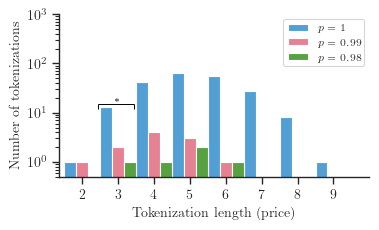

In [66]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=permuted_palette, ax=ax, width=1, legend=True)   

ax.legend(title="p", loc='upper left')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="7.5",loc='upper right', title='', labels=[r"$p=1$",r"$p=0.99$", r"$p=0.98$"])


sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length (price)")
ax.set_ylabel("Number of tokenizations")

print(ax.get_xticklabels())
x_labels = ax.get_xticklabels()  # Get the current x-axis labels
#x_labels[0].set_text(r"$2^*$") 
ax.set_xticklabels(x_labels)  # Update the x-axis labels
#print(ax.get_xticklabels())

plt.hlines(y=15, xmin=0.45, xmax=1.45, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.vlines(x=1.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.text(0.90,16,"*", color="black", fontsize=8)


ax.set_xlim([-0.65,8])
ax.set_ylim([0.5,10**3])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topp_causeless.pdf', dpi=300)

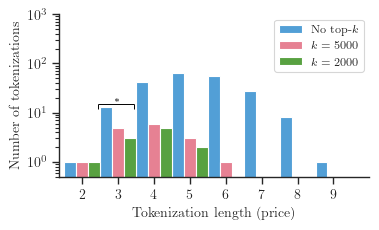

In [65]:



sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

#palette = {"counts": "blue", "counts_08_": "orange", "counts_09_": "green", "counts_095_": "red", "counts_099_": "purple"}
# draw axis
sns.barplot(data=df_long_k, x="lengths",y="y",hue="class", palette=permuted_palette, ax=ax, width=1, legend=True)   

#ax.legend(title="p", loc='upper left')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles,fontsize="small",loc='upper right', title='', labels=[r"No top-$k$",r"$k=5000$", r"$k=2000$"])


plt.hlines(y=15, xmin=0.45, xmax=1.45, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.vlines(x=1.45, ymin=12 ,ymax=15, colors='black', linewidth=0.7)
plt.text(0.90,16,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,8])
ax.set_ylim([0.5,10**3])

sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length (price)")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/fixed_string/hist_fixed_string_topk_causeless.pdf', dpi=300)